In [1]:
import numpy as np
import pandas as pd
import datetime
pd.options.display.max_columns = 1000
from sklearn.model_selection import train_test_split

In [2]:
prost = pd.read_csv('clean_2010_2017.csv', index_col=0)
prost['fda'] = pd.to_datetime(prost.fda)
prost['dispdt'] = pd.to_datetime(prost.dispdt)

In [11]:
#Build ML model

In [3]:
list(prost.columns.values)

['cas',
 'curr_off_lit',
 'fda',
 'bam',
 'def_rac',
 'def_sex',
 'def_dob',
 'aty_coc_lit',
 'disposition',
 'sentence',
 'dispdt',
 'comp_agency',
 'Latitude',
 'Longitude',
 'judge',
 'offcat',
 'location',
 'length',
 'ageatfiling',
 'num',
 'date_unit',
 'com_off_lit',
 'disptdayofweek',
 'filedayofweek']

In [4]:
features = [
    'cas',
 'curr_off_lit',
 #'fda',
 'bam',
 'def_rac',
 'def_sex',
 #'def_dob',
 'aty_coc_lit',
 #'disposition',
 #'sentence',
 #'dispdt',
 'comp_agency',
 'Latitude',
 'Longitude',
 'judge',
 #'offcat',
 #'location',
 #'length',
 'ageatfiling',
 #'num',
 #'date_unit',
 'com_off_lit',
 'disptdayofweek',
 'filedayofweek'
]

In [6]:
xvar = prost[features]
xvar= pd.get_dummies(xvar, columns= ['filedayofweek', 'disptdayofweek', 'judge', 'def_sex', 'def_rac', 'aty_coc_lit', 'comp_agency', 'curr_off_lit', 'com_off_lit'])

In [7]:
xvar.head(2)

,cas,bam,Latitude,Longitude,ageatfiling,filedayofweek_0,filedayofweek_1,filedayofweek_2,filedayofweek_3,filedayofweek_4,filedayofweek_5,filedayofweek_6,disptdayofweek_0.0,disptdayofweek_1.0,disptdayofweek_2.0,disptdayofweek_3.0,disptdayofweek_4.0,judge_Analia Wilkerson,judge_Bill Harmon,judge_Brad Hart,judge_Catherine Evans,judge_Dan Spjut,judge_Darrell Jordan,judge_Denise Bradley,judge_Denise Collins,judge_Diane Bull,judge_Don Smyth,judge_George Powell,judge_Hazel Jones,judge_Herb Ritchie,judge_Jan Krocker,judge_Jay Karahan,judge_Jean Spradling,judge_Jeannine Barr,judge_Jim Wallace,judge_John Clinton,judge_Katherine Cabaniss,judge_Kelli Johnson,judge_Kristin Guiney,judge_Larry Standley,judge_Marc Carter,judge_Margaret Harris,judge_Maria Jackson,judge_Mike Fields,judge_Mike McSpadden,judge_Natalie Fleming,judge_Nikita Harmon,judge_Pam Derbyshire,judge_Paula Goodhart,judge_Ramona Franklin,judge_Randy Roll,judge_Robert Johnson,judge_Robin Brown,judge_Susan Brown,judge_Vanessa Velasquez,def_sex_F,def_sex_M,def_rac_A,def_rac_B,def_rac_I,def_rac_U,def_rac_W,aty_coc_lit_APPOINTED ATTORNEY ON APPEAL,aty_coc_lit_APPOINTED DEFENSE ATTORNEY,aty_coc_lit_APPOINTED PUBLIC DEFENDER,aty_coc_lit_HIRED ATTY ON APPEAL,aty_coc_lit_HIRED DEFENSE ATTORNEY,aty_coc_lit_PUBLIC DEFENDER APPOINTED ON APPEAL,comp_agency_ATTORNEY GENERAL STATE OF TEXAS,comp_agency_BAYTOWN POLICE DEPARTMENT,comp_agency_CONSTABLE PCT 1,comp_agency_CONSTABLE PCT 2,comp_agency_CONSTABLE PCT 3,comp_agency_CONSTABLE PCT 4,comp_agency_CONSTABLE PCT 5,comp_agency_CONSTABLE PCT 6,comp_agency_CONSTABLE PCT 7,comp_agency_CONSTABLE PCT 8,comp_agency_DEER PARK POLICE DEPARTMENT,comp_agency_DEPARTMENT OF PUBLIC SAFETY,comp_agency_HARRIS COUNTY D. A.,comp_agency_HOUSTON POLICE DEPARTMENT,comp_agency_JACINTO CITY POLICE DEPARTMENT,comp_agency_JERSEY VILLAGE POLICE DEPARTMENT,comp_agency_LA PORTE POLICE DEPARTMENT,comp_agency_METRO P. D. CITY OF HOUSTON,comp_agency_PASADENA POLICE DEPARTMENT,comp_agency_SEABROOK POLICE DEPARTMENT,comp_agency_SHERIFFS DEPARTMENT HARRIS COUNTY,comp_agency_TEXAS ALCOHOLIC BEVERAGE CONTROL,comp_agency_TOMBALL POLICE DEPARTMENT,comp_agency_U.H. CENTRAL CAMPUS PD,comp_agency_WEBSTER POLICE DEPARTMENT,curr_off_lit_AGG PROMOTION OF PROSTITUTION,curr_off_lit_AGG PROMOTION PROST,curr_off_lit_ATT AGG PROM OF PROSTITUTION,curr_off_lit_PROMOTE PROSTITUTION,curr_off_lit_PROSTITUTION,curr_off_lit_PROSTITUTION - NON PUBLIC OFFE,curr_off_lit_PROSTITUTION - PUBLIC OFFER,curr_off_lit_PROSTITUTION SOLICIT PERSON >1,curr_off_lit_PROSTITUTION WITH 3 OR MORE PR,curr_off_lit_PROSTITUTION-2ND,com_off_lit_AGG PROMOTION OF PROSTITUTION,com_off_lit_AGG PROMOTION PROST,com_off_lit_AGG PROMOTION PROST PERSON/S <,com_off_lit_ATTEMPTED COMPEL PROSTITUTION,com_off_lit_BRIBERY,com_off_lit_COMPEL PROST BY FORCE/THREAT/F,com_off_lit_COMPEL PROSTITUTION-FORCE,com_off_lit_COMPEL PROSTITUTION-MINOR,com_off_lit_COMPELLING PROSTITUTION < 18 Y,com_off_lit_ENGAGING IN ORG CRIM ACTIVITY,com_off_lit_PROMOTE PROSTITUTION,com_off_lit_PROMOTE PROSTITUTION W/PREV CO,com_off_lit_PROSTITUTION,com_off_lit_PROSTITUTION - NON PUBLIC OFFE,com_off_lit_PROSTITUTION - PUBLIC OFFER,com_off_lit_PROSTITUTION PUBLIC PAY FEE 3,com_off_lit_PROSTITUTION SOLICIT PERSON >1,com_off_lit_PROSTITUTION WITH 3 OR MORE PR,com_off_lit_PROSTITUTION-2ND
1,124692801010,15000.0,29.833946,-95.344197,39.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,124699801010,15000.0,30.152021,-95.310683,34.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [8]:
#yvar, get dummies on dispot
yvar= pd.get_dummies(prost['disposition'])

In [9]:
yvar.head(2)

,ACQUITTAL BY JURY,CONVICTION BY JURY,CONVICTION-NOLO CONTENDERE,CONVICTION-PLEA OF GUILTY,DEF ADJ GLT ADJUDICATED,DEFERRED ADJUD OF GUILT,DEFERRED ADJUDICATION TERMINATED,DISMISSED,GUILTY PLEA - JURY VERDICT,GUILTY PLEA-NO JURY,LESSER OFF. GUILTY PLEA - NO JURY,NO BILLED,NOLO CONTENDRE PLEA - NO JURY (CC),NOT GUILTY PLEA - JURY VERDICT,PROBATION BY JURY TRIAL,PROBATION TERMINATED,PROBATION-NOLO CONTENDERE,PROBATION-PLEA OF GUILTY,UNSATISFACTORY TERMINATION
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(xvar, yvar)
reg.score(xvar, yvar)

0.390801884643319

In [11]:
reg.coef_

array([[ -1.03132095e-13,  -2.57231835e-09,  -1.46949498e-04, ...,
          1.12099194e-04,   4.21047007e-04,  -4.04715538e-04],
       [ -5.85780068e-14,  -6.53765465e-10,   4.68275197e-05, ...,
         -4.05721353e-04,  -5.91731364e-04,  -1.03437837e-03],
       [ -2.19866835e-13,  -1.13187170e-08,   3.06660440e-04, ...,
         -1.29448051e-03,   9.02741772e-04,  -3.69139601e-03],
       ..., 
       [  6.28205841e-15,   6.95032002e-10,  -1.23064464e-05, ...,
          6.38594504e-04,   7.51816413e-05,  -5.09951528e-05],
       [ -3.42493197e-14,   7.30802620e-10,  -1.16135383e-05, ...,
          3.25488440e-04,  -5.23885290e-05,   3.11606788e-04],
       [  2.09677407e-14,  -3.68498568e-09,  -9.85703525e-06, ...,
         -1.77805087e-04,  -8.77367648e-03,   8.07619970e-04]])

In [12]:
reg.intercept_

array([  2.75072625e-02,  -2.58398403e-02,   1.93800139e-02,
         5.43855174e-01,   5.98727232e-02,   3.08273696e-01,
         1.51513521e-01,  -1.30598214e+00,  -8.25887042e-04,
        -3.79964647e-02,   1.14279668e-01,   1.03360191e-01,
        -4.80634714e-03,   3.61187877e-02,   6.91380272e-03,
         6.17825932e-03,   5.94742280e-04,   4.55327580e-03,
        -6.93595875e-03])

In [13]:
reg.predict(xvar)

array([[  4.47358058e-04,   8.52818220e-05,   6.71449811e-04, ...,
          5.34618263e-05,   3.63945507e-04,   4.34263872e-04],
       [ -8.32594286e-04,  -2.27232784e-03,  -3.22113169e-06, ...,
         -1.77918192e-04,   1.16119580e-03,   1.09905414e-03],
       [  7.34935473e-04,   5.88974191e-04,   2.39393285e-04, ...,
          5.95214693e-05,   4.97649138e-04,   3.78749408e-03],
       ..., 
       [ -2.89431148e-03,  -4.21175117e-03,  -3.12884671e-03, ...,
          2.95235674e-04,   1.50819182e-03,  -1.29796348e-03],
       [ -4.68960828e-03,  -6.41613839e-04,  -3.83691424e-03, ...,
          1.11088565e-03,  -3.99093140e-04,   1.20010850e-03],
       [ -2.67719547e-03,  -1.13740918e-03,  -4.52902364e-03, ...,
         -3.72962370e-04,   1.68465515e-03,   7.87310951e-03]])

In [14]:
#assess model with Test/Train Split
X_train, X_test, y_train, y_test = train_test_split(xvar, yvar, test_size=0.2, random_state=11)

In [15]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.39469336459723292

In [16]:
reg.score(X_test, y_test)

0.36864290203949762

In [17]:
reg.coef_.shape

(19, 122)

In [19]:
#pd.DataFrame(sorted(zip(np.abs(reg.coef_.ravel()), reg.coef_.ravel(), X_train.columns), reverse=True)).round(3)*100

In [20]:
lr_coef =pd.DataFrame(reg.coef_, columns = X_train.columns, index=y_train.columns).round(4)*100

In [21]:
lr_coef = lr_coef.T

In [22]:
lr_coef.sort_values('CONVICTION-PLEA OF GUILTY')

,ACQUITTAL BY JURY,CONVICTION BY JURY,CONVICTION-NOLO CONTENDERE,CONVICTION-PLEA OF GUILTY,DEF ADJ GLT ADJUDICATED,DEFERRED ADJUD OF GUILT,DEFERRED ADJUDICATION TERMINATED,DISMISSED,GUILTY PLEA - JURY VERDICT,GUILTY PLEA-NO JURY,LESSER OFF. GUILTY PLEA - NO JURY,NO BILLED,NOLO CONTENDRE PLEA - NO JURY (CC),NOT GUILTY PLEA - JURY VERDICT,PROBATION BY JURY TRIAL,PROBATION TERMINATED,PROBATION-NOLO CONTENDERE,PROBATION-PLEA OF GUILTY,UNSATISFACTORY TERMINATION
comp_agency_SEABROOK POLICE DEPARTMENT,-0.11,-0.39,-1.22,-62.35,-0.56,-0.87,6.01,25.27,1.05,50.25,-16.23,0.05,0.23,-0.29,-0.59,-0.82,0.03,-0.25,0.79
def_sex_M,0.01,0.36,0.53,-48.25,0.17,14.51,14.09,18.48,0.08,-23.04,21.77,0.23,0.32,0.23,0.01,0.07,0.01,0.17,0.26
judge_Randy Roll,-0.29,-0.19,-0.71,-47.18,-1.00,-0.32,-0.78,11.72,0.03,38.17,1.77,-0.40,-0.09,-0.12,-0.17,-0.22,-0.03,-0.08,-0.13
judge_Robert Johnson,-0.29,-0.19,-0.72,-46.98,-0.87,-0.16,-2.71,14.84,0.00,33.73,3.58,-0.36,-0.09,-0.08,-0.16,-0.20,-0.03,-0.07,0.74
judge_Brad Hart,-0.26,-0.17,-0.70,-46.68,-1.01,-5.79,-3.97,12.53,0.01,42.63,2.70,1.47,-0.08,-0.10,-0.16,-0.18,-0.03,-0.06,-0.15
judge_Hazel Jones,-0.28,-0.21,-0.75,-46.53,-0.76,-6.72,-2.97,12.87,-0.03,44.84,1.50,-0.33,-0.10,-0.02,-0.18,-0.21,-0.03,-0.08,-0.01
judge_Marc Carter,-0.26,-0.22,-0.68,-46.43,-0.87,2.74,1.77,20.30,0.01,18.89,4.04,-0.33,0.79,-0.07,-0.16,-0.20,-0.03,-0.08,0.78
judge_Jeannine Barr,-0.26,-0.20,-0.74,-46.29,-0.91,-9.45,-3.78,12.52,0.01,47.12,2.89,-0.37,-0.03,-0.04,-0.15,-0.18,-0.03,-0.08,-0.04
judge_Katherine Cabaniss,-0.28,-0.20,-0.69,-46.19,-1.08,-0.16,-3.29,15.51,-0.03,34.59,1.85,-0.34,-0.06,-0.04,-0.16,-0.17,-0.02,-0.07,0.84
judge_George Powell,-0.25,-0.47,-0.69,-45.99,-0.86,-4.08,-3.30,16.96,-0.14,35.39,3.61,0.60,-0.06,-0.27,-0.16,-0.17,-0.03,-0.07,-0.03


In [23]:
lr_coef.sort_values('DISMISSED', ascending=False)

,ACQUITTAL BY JURY,CONVICTION BY JURY,CONVICTION-NOLO CONTENDERE,CONVICTION-PLEA OF GUILTY,DEF ADJ GLT ADJUDICATED,DEFERRED ADJUD OF GUILT,DEFERRED ADJUDICATION TERMINATED,DISMISSED,GUILTY PLEA - JURY VERDICT,GUILTY PLEA-NO JURY,LESSER OFF. GUILTY PLEA - NO JURY,NO BILLED,NOLO CONTENDRE PLEA - NO JURY (CC),NOT GUILTY PLEA - JURY VERDICT,PROBATION BY JURY TRIAL,PROBATION TERMINATED,PROBATION-NOLO CONTENDERE,PROBATION-PLEA OF GUILTY,UNSATISFACTORY TERMINATION
comp_agency_JERSEY VILLAGE POLICE DEPARTMENT,-0.01,0.32,-0.09,-5.94,-1.19,-7.91,6.00,60.15,1.26,-31.32,-20.47,-1.32,0.41,0.01,-0.17,-0.02,-0.01,-0.02,0.33
curr_off_lit_AGG PROMOTION PROST,-0.11,-1.78,-0.11,3.77,0.19,-4.75,0.75,50.68,3.12,-15.50,-32.71,-4.46,0.04,-0.17,0.01,0.02,0.01,-0.02,1.02
disptdayofweek_2.0,-0.04,0.25,-0.01,45.88,0.82,5.79,1.39,49.14,-0.00,-3.16,-0.04,0.01,-0.02,-0.06,0.12,-0.13,-0.01,-0.06,0.14
disptdayofweek_3.0,-0.03,-0.09,0.04,47.00,1.17,5.44,1.07,48.38,0.02,-3.21,0.04,0.06,0.18,0.00,-0.03,-0.10,0.02,-0.11,0.15
disptdayofweek_1.0,0.04,-0.06,0.03,44.93,1.18,5.05,3.10,48.02,-0.00,-2.65,0.12,-0.01,0.02,0.00,-0.00,-0.08,-0.02,-0.06,0.39
disptdayofweek_4.0,-0.15,-0.17,0.05,48.56,1.14,3.10,2.30,47.84,0.03,-2.47,-0.03,-0.03,-0.02,-0.05,-0.12,-0.06,-0.02,-0.01,0.13
disptdayofweek_0.0,-0.10,-0.13,0.11,52.49,1.01,2.78,1.05,44.66,0.00,-1.97,-0.08,0.05,-0.04,-0.03,-0.07,-0.05,-0.02,0.01,0.33
comp_agency_CONSTABLE PCT 6,-0.25,-0.05,-0.18,-20.54,-0.27,-11.50,-1.33,41.64,1.10,-8.25,1.12,-0.50,0.09,-0.28,-0.15,-0.19,-0.02,-0.10,-0.34
comp_agency_CONSTABLE PCT 7,-0.77,-0.46,-1.19,-40.00,-1.95,-11.20,-5.55,32.76,1.08,45.88,-17.22,-0.19,0.35,-0.34,-0.57,-0.44,-0.05,-0.17,0.01
comp_agency_SEABROOK POLICE DEPARTMENT,-0.11,-0.39,-1.22,-62.35,-0.56,-0.87,6.01,25.27,1.05,50.25,-16.23,0.05,0.23,-0.29,-0.59,-0.82,0.03,-0.25,0.79


In [24]:
y_test_pred = pd.DataFrame(reg.predict(X_test)>.5).astype(int)
y_test_pred.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
y_test_pred.columns = y_test.columns

In [26]:
y_test_pred.index = y_test.index

In [27]:
num_correct = (y_test == y_test_pred).sum()/len(y_test)

In [28]:
num_correct.sort_values()

CONVICTION-PLEA OF GUILTY             0.808165
DISMISSED                             0.839779
DEFERRED ADJUD OF GUILT               0.912830
DEFERRED ADJUDICATION TERMINATED      0.947514
GUILTY PLEA-NO JURY                   0.951811
LESSER OFF. GUILTY PLEA - NO JURY     0.990485
DEF ADJ GLT ADJUDICATED               0.990485
CONVICTION-NOLO CONTENDERE            0.995703
UNSATISFACTORY TERMINATION            0.996624
CONVICTION BY JURY                    0.998158
ACQUITTAL BY JURY                     0.998465
PROBATION TERMINATED                  0.998772
PROBATION-PLEA OF GUILTY              0.999386
NO BILLED                             0.999386
NOLO CONTENDRE PLEA - NO JURY (CC)    0.999693
NOT GUILTY PLEA - JURY VERDICT        0.999693
PROBATION BY JURY TRIAL               0.999693
PROBATION-NOLO CONTENDERE             0.999693
GUILTY PLEA - JURY VERDICT            0.999693
dtype: float64

In [29]:
df_train = X_train.copy()

In [30]:
df_train[list(y_train.columns)] = y_train

In [31]:
df_train.head()

,cas,bam,Latitude,Longitude,ageatfiling,filedayofweek_0,filedayofweek_1,filedayofweek_2,filedayofweek_3,filedayofweek_4,filedayofweek_5,filedayofweek_6,disptdayofweek_0.0,disptdayofweek_1.0,disptdayofweek_2.0,disptdayofweek_3.0,disptdayofweek_4.0,judge_Analia Wilkerson,judge_Bill Harmon,judge_Brad Hart,judge_Catherine Evans,judge_Dan Spjut,judge_Darrell Jordan,judge_Denise Bradley,judge_Denise Collins,judge_Diane Bull,judge_Don Smyth,judge_George Powell,judge_Hazel Jones,judge_Herb Ritchie,judge_Jan Krocker,judge_Jay Karahan,judge_Jean Spradling,judge_Jeannine Barr,judge_Jim Wallace,judge_John Clinton,judge_Katherine Cabaniss,judge_Kelli Johnson,judge_Kristin Guiney,judge_Larry Standley,judge_Marc Carter,judge_Margaret Harris,judge_Maria Jackson,judge_Mike Fields,judge_Mike McSpadden,judge_Natalie Fleming,judge_Nikita Harmon,judge_Pam Derbyshire,judge_Paula Goodhart,judge_Ramona Franklin,judge_Randy Roll,judge_Robert Johnson,judge_Robin Brown,judge_Susan Brown,judge_Vanessa Velasquez,def_sex_F,def_sex_M,def_rac_A,def_rac_B,def_rac_I,def_rac_U,def_rac_W,aty_coc_lit_APPOINTED ATTORNEY ON APPEAL,aty_coc_lit_APPOINTED DEFENSE ATTORNEY,aty_coc_lit_APPOINTED PUBLIC DEFENDER,aty_coc_lit_HIRED ATTY ON APPEAL,aty_coc_lit_HIRED DEFENSE ATTORNEY,aty_coc_lit_PUBLIC DEFENDER APPOINTED ON APPEAL,comp_agency_ATTORNEY GENERAL STATE OF TEXAS,comp_agency_BAYTOWN POLICE DEPARTMENT,comp_agency_CONSTABLE PCT 1,comp_agency_CONSTABLE PCT 2,comp_agency_CONSTABLE PCT 3,comp_agency_CONSTABLE PCT 4,comp_agency_CONSTABLE PCT 5,comp_agency_CONSTABLE PCT 6,comp_agency_CONSTABLE PCT 7,comp_agency_CONSTABLE PCT 8,comp_agency_DEER PARK POLICE DEPARTMENT,comp_agency_DEPARTMENT OF PUBLIC SAFETY,comp_agency_HARRIS COUNTY D. A.,comp_agency_HOUSTON POLICE DEPARTMENT,comp_agency_JACINTO CITY POLICE DEPARTMENT,comp_agency_JERSEY VILLAGE POLICE DEPARTMENT,comp_agency_LA PORTE POLICE DEPARTMENT,comp_agency_METRO P. D. CITY OF HOUSTON,comp_agency_PASADENA POLICE DEPARTMENT,comp_agency_SEABROOK POLICE DEPARTMENT,comp_agency_SHERIFFS DEPARTMENT HARRIS COUNTY,comp_agency_TEXAS ALCOHOLIC BEVERAGE CONTROL,comp_agency_TOMBALL POLICE DEPARTMENT,comp_agency_U.H. CENTRAL CAMPUS PD,comp_agency_WEBSTER POLICE DEPARTMENT,curr_off_lit_AGG PROMOTION OF PROSTITUTION,curr_off_lit_AGG PROMOTION PROST,curr_off_lit_ATT AGG PROM OF PROSTITUTION,curr_off_lit_PROMOTE PROSTITUTION,curr_off_lit_PROSTITUTION,curr_off_lit_PROSTITUTION - NON PUBLIC OFFE,curr_off_lit_PROSTITUTION - PUBLIC OFFER,curr_off_lit_PROSTITUTION SOLICIT PERSON >1,curr_off_lit_PROSTITUTION WITH 3 OR MORE PR,curr_off_lit_PROSTITUTION-2ND,com_off_lit_AGG PROMOTION OF PROSTITUTION,com_off_lit_AGG PROMOTION PROST,com_off_lit_AGG PROMOTION PROST PERSON/S <,com_off_lit_ATTEMPTED COMPEL PROSTITUTION,com_off_lit_BRIBERY,com_off_lit_COMPEL PROST BY FORCE/THREAT/F,com_off_lit_COMPEL PROSTITUTION-FORCE,com_off_lit_COMPEL PROSTITUTION-MINOR,com_off_lit_COMPELLING PROSTITUTION < 18 Y,com_off_lit_ENGAGING IN ORG CRIM ACTIVITY,com_off_lit_PROMOTE PROSTITUTION,com_off_lit_PROMOTE PROSTITUTION W/PREV CO,com_off_lit_PROSTITUTION,com_off_lit_PROSTITUTION - NON PUBLIC OFFE,com_off_lit_PROSTITUTION - PUBLIC OFFER,com_off_lit_PROSTITUTION PUBLIC PAY FEE 3,com_off_lit_PROSTITUTION SOLICIT PERSON >1,com_off_lit_PROSTITUTION WITH 3 OR MORE PR,com_off_lit_PROSTITUTION-2ND,ACQUITTAL BY JURY,CONVICTION BY JURY,CONVICTION-NOLO CONTENDERE,CONVICTION-PLEA OF GUILTY,DEF ADJ GLT ADJUDICATED,DEFERRED ADJUD OF GUILT,DEFERRED ADJUDICATION TERMINATED,DISMISSED,GUILTY PLEA - JURY VERDICT,GUILTY PLEA-NO JURY,LESSER OFF. GUILTY PLEA - NO JURY,NO BILLED,NOLO CONTENDRE PLEA - NO JURY (CC),NOT GUILTY PLEA - JURY VERDICT,PROBATION BY JURY TRIAL,PROBATION TERMINATED,PROBATION-NOLO CONTENDERE,PROBATION-PLEA OF GUILTY,UNSATISFACTORY TERMINATION
5171,172449601010,5000.0,29.823583,-95.523077,35.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

In [32]:
df_train.describe()

,cas,bam,Latitude,Longitude,ageatfiling,filedayofweek_0,filedayofweek_1,filedayofweek_2,filedayofweek_3,filedayofweek_4,filedayofweek_5,filedayofweek_6,disptdayofweek_0.0,disptdayofweek_1.0,disptdayofweek_2.0,disptdayofweek_3.0,disptdayofweek_4.0,judge_Analia Wilkerson,judge_Bill Harmon,judge_Brad Hart,judge_Catherine Evans,judge_Dan Spjut,judge_Darrell Jordan,judge_Denise Bradley,judge_Denise Collins,judge_Diane Bull,judge_Don Smyth,judge_George Powell,judge_Hazel Jones,judge_Herb Ritchie,judge_Jan Krocker,judge_Jay Karahan,judge_Jean Spradling,judge_Jeannine Barr,judge_Jim Wallace,judge_John Clinton,judge_Katherine Cabaniss,judge_Kelli Johnson,judge_Kristin Guiney,judge_Larry Standley,judge_Marc Carter,judge_Margaret Harris,judge_Maria Jackson,judge_Mike Fields,judge_Mike McSpadden,judge_Natalie Fleming,judge_Nikita Harmon,judge_Pam Derbyshire,judge_Paula Goodhart,judge_Ramona Franklin,judge_Randy Roll,judge_Robert Johnson,judge_Robin Brown,judge_Susan Brown,judge_Vanessa Velasquez,def_sex_F,def_sex_M,def_rac_A,def_rac_B,def_rac_I,def_rac_U,def_rac_W,aty_coc_lit_APPOINTED ATTORNEY ON APPEAL,aty_coc_lit_APPOINTED DEFENSE ATTORNEY,aty_coc_lit_APPOINTED PUBLIC DEFENDER,aty_coc_lit_HIRED ATTY ON APPEAL,aty_coc_lit_HIRED DEFENSE ATTORNEY,aty_coc_lit_PUBLIC DEFENDER APPOINTED ON APPEAL,comp_agency_ATTORNEY GENERAL STATE OF TEXAS,comp_agency_BAYTOWN POLICE DEPARTMENT,comp_agency_CONSTABLE PCT 1,comp_agency_CONSTABLE PCT 2,comp_agency_CONSTABLE PCT 3,comp_agency_CONSTABLE PCT 4,comp_agency_CONSTABLE PCT 5,comp_agency_CONSTABLE PCT 6,comp_agency_CONSTABLE PCT 7,comp_agency_CONSTABLE PCT 8,comp_agency_DEER PARK POLICE DEPARTMENT,comp_agency_DEPARTMENT OF PUBLIC SAFETY,comp_agency_HARRIS COUNTY D. A.,comp_agency_HOUSTON POLICE DEPARTMENT,comp_agency_JACINTO CITY POLICE DEPARTMENT,comp_agency_JERSEY VILLAGE POLICE DEPARTMENT,comp_agency_LA PORTE POLICE DEPARTMENT,comp_agency_METRO P. D. CITY OF HOUSTON,comp_agency_PASADENA POLICE DEPARTMENT,comp_agency_SEABROOK POLICE DEPARTMENT,comp_agency_SHERIFFS DEPARTMENT HARRIS COUNTY,comp_agency_TEXAS ALCOHOLIC BEVERAGE CONTROL,comp_agency_TOMBALL POLICE DEPARTMENT,comp_agency_U.H. CENTRAL CAMPUS PD,comp_agency_WEBSTER POLICE DEPARTMENT,curr_off_lit_AGG PROMOTION OF PROSTITUTION,curr_off_lit_AGG PROMOTION PROST,curr_off_lit_ATT AGG PROM OF PROSTITUTION,curr_off_lit_PROMOTE PROSTITUTION,curr_off_lit_PROSTITUTION,curr_off_lit_PROSTITUTION - NON PUBLIC OFFE,curr_off_lit_PROSTITUTION - PUBLIC OFFER,curr_off_lit_PROSTITUTION SOLICIT PERSON >1,curr_off_lit_PROSTITUTION WITH 3 OR MORE PR,curr_off_lit_PROSTITUTION-2ND,com_off_lit_AGG PROMOTION OF PROSTITUTION,com_off_lit_AGG PROMOTION PROST,com_off_lit_AGG PROMOTION PROST PERSON/S <,com_off_lit_ATTEMPTED COMPEL PROSTITUTION,com_off_lit_BRIBERY,com_off_lit_COMPEL PROST BY FORCE/THREAT/F,com_off_lit_COMPEL PROSTITUTION-FORCE,com_off_lit_COMPEL PROSTITUTION-MINOR,com_off_lit_COMPELLING PROSTITUTION < 18 Y,com_off_lit_ENGAGING IN ORG CRIM ACTIVITY,com_off_lit_PROMOTE PROSTITUTION,com_off_lit_PROMOTE PROSTITUTION W/PREV CO,com_off_lit_PROSTITUTION,com_off_lit_PROSTITUTION - NON PUBLIC OFFE,com_off_lit_PROSTITUTION - PUBLIC OFFER,com_off_lit_PROSTITUTION PUBLIC PAY FEE 3,com_off_lit_PROSTITUTION SOLICIT PERSON >1,com_off_lit_PROSTITUTION WITH 3 OR MORE PR,com_off_lit_PROSTITUTION-2ND,ACQUITTAL BY JURY,CONVICTION BY JURY,CONVICTION-NOLO CONTENDERE,CONVICTION-PLEA OF GUILTY,DEF ADJ GLT ADJUDICATED,DEFERRED ADJUD OF GUILT,DEFERRED ADJUDICATION TERMINATED,DISMISSED,GUILTY PLEA - JURY VERDICT,GUILTY PLEA-NO JURY,LESSER OFF. GUILTY PLEA - NO JURY,NO BILLED,NOLO CONTENDRE PLEA - NO JURY (CC),NOT GUILTY PLEA - JURY VERDICT,PROBATION BY JURY TRIAL,PROBATION TERMINATED,PROBATION-NOLO CONTENDERE,PROBATION-PLEA OF GUILTY,UNSATISFACTORY TERMINATION
count,1.302900e+04,13029.000000,13029.000000,13029.000000,13029.000000,13029.000000,13029.000000,13029.000000,13029.000000,13029.000000,13029.000000,13029.000000,13029.000000,13029.000000,13029.000000,13029.000000,13029.000000,1

In [36]:
C= df_train.corr()

In [40]:
C.head()

,cas,bam,Latitude,Longitude,ageatfiling,filedayofweek_0,filedayofweek_1,filedayofweek_2,filedayofweek_3,filedayofweek_4,filedayofweek_5,filedayofweek_6,disptdayofweek_0.0,disptdayofweek_1.0,disptdayofweek_2.0,disptdayofweek_3.0,disptdayofweek_4.0,judge_Analia Wilkerson,judge_Bill Harmon,judge_Brad Hart,judge_Catherine Evans,judge_Dan Spjut,judge_Darrell Jordan,judge_Denise Bradley,judge_Denise Collins,judge_Diane Bull,judge_Don Smyth,judge_George Powell,judge_Hazel Jones,judge_Herb Ritchie,judge_Jan Krocker,judge_Jay Karahan,judge_Jean Spradling,judge_Jeannine Barr,judge_Jim Wallace,judge_John Clinton,judge_Katherine Cabaniss,judge_Kelli Johnson,judge_Kristin Guiney,judge_Larry Standley,judge_Marc Carter,judge_Margaret Harris,judge_Maria Jackson,judge_Mike Fields,judge_Mike McSpadden,judge_Natalie Fleming,judge_Nikita Harmon,judge_Pam Derbyshire,judge_Paula Goodhart,judge_Ramona Franklin,judge_Randy Roll,judge_Robert Johnson,judge_Robin Brown,judge_Susan Brown,judge_Vanessa Velasquez,def_sex_F,def_sex_M,def_rac_A,def_rac_B,def_rac_I,def_rac_U,def_rac_W,aty_coc_lit_APPOINTED ATTORNEY ON APPEAL,aty_coc_lit_APPOINTED DEFENSE ATTORNEY,aty_coc_lit_APPOINTED PUBLIC DEFENDER,aty_coc_lit_HIRED ATTY ON APPEAL,aty_coc_lit_HIRED DEFENSE ATTORNEY,aty_coc_lit_PUBLIC DEFENDER APPOINTED ON APPEAL,comp_agency_ATTORNEY GENERAL STATE OF TEXAS,comp_agency_BAYTOWN POLICE DEPARTMENT,comp_agency_CONSTABLE PCT 1,comp_agency_CONSTABLE PCT 2,comp_agency_CONSTABLE PCT 3,comp_agency_CONSTABLE PCT 4,comp_agency_CONSTABLE PCT 5,comp_agency_CONSTABLE PCT 6,comp_agency_CONSTABLE PCT 7,comp_agency_CONSTABLE PCT 8,comp_agency_DEER PARK POLICE DEPARTMENT,comp_agency_DEPARTMENT OF PUBLIC SAFETY,comp_agency_HARRIS COUNTY D. A.,comp_agency_HOUSTON POLICE DEPARTMENT,comp_agency_JACINTO CITY POLICE DEPARTMENT,comp_agency_JERSEY VILLAGE POLICE DEPARTMENT,comp_agency_LA PORTE POLICE DEPARTMENT,comp_agency_METRO P. D. CITY OF HOUSTON,comp_agency_PASADENA POLICE DEPARTMENT,comp_agency_SEABROOK POLICE DEPARTMENT,comp_agency_SHERIFFS DEPARTMENT HARRIS COUNTY,comp_agency_TEXAS ALCOHOLIC BEVERAGE CONTROL,comp_agency_TOMBALL POLICE DEPARTMENT,comp_agency_U.H. CENTRAL CAMPUS PD,comp_agency_WEBSTER POLICE DEPARTMENT,curr_off_lit_AGG PROMOTION OF PROSTITUTION,curr_off_lit_AGG PROMOTION PROST,curr_off_lit_ATT AGG PROM OF PROSTITUTION,curr_off_lit_PROMOTE PROSTITUTION,curr_off_lit_PROSTITUTION,curr_off_lit_PROSTITUTION - NON PUBLIC OFFE,curr_off_lit_PROSTITUTION - PUBLIC OFFER,curr_off_lit_PROSTITUTION SOLICIT PERSON >1,curr_off_lit_PROSTITUTION WITH 3 OR MORE PR,curr_off_lit_PROSTITUTION-2ND,com_off_lit_AGG PROMOTION OF PROSTITUTION,com_off_lit_AGG PROMOTION PROST,com_off_lit_AGG PROMOTION PROST PERSON/S <,com_off_lit_ATTEMPTED COMPEL PROSTITUTION,com_off_lit_BRIBERY,com_off_lit_COMPEL PROST BY FORCE/THREAT/F,com_off_lit_COMPEL PROSTITUTION-FORCE,com_off_lit_COMPEL PROSTITUTION-MINOR,com_off_lit_COMPELLING PROSTITUTION < 18 Y,com_off_lit_ENGAGING IN ORG CRIM ACTIVITY,com_off_lit_PROMOTE PROSTITUTION,com_off_lit_PROMOTE PROSTITUTION W/PREV CO,com_off_lit_PROSTITUTION,com_off_lit_PROSTITUTION - NON PUBLIC OFFE,com_off_lit_PROSTITUTION - PUBLIC OFFER,com_off_lit_PROSTITUTION PUBLIC PAY FEE 3,com_off_lit_PROSTITUTION SOLICIT PERSON >1,com_off_lit_PROSTITUTION WITH 3 OR MORE PR,com_off_lit_PROSTITUTION-2ND,ACQUITTAL BY JURY,CONVICTION BY JURY,CONVICTION-NOLO CONTENDERE,CONVICTION-PLEA OF GUILTY,DEF ADJ GLT ADJUDICATED,DEFERRED ADJUD OF GUILT,DEFERRED ADJUDICATION TERMINATED,DISMISSED,GUILTY PLEA - JURY VERDICT,GUILTY PLEA-NO JURY,LESSER OFF. GUILTY PLEA - NO JURY,NO BILLED,NOLO CONTENDRE PLEA - NO JURY (CC),NOT GUILTY PLEA - JURY VERDICT,PROBATION BY JURY TRIAL,PROBATION TERMINATED,PROBATION-NOLO CONTENDERE,PROBATION-PLEA OF GUILTY,UNSATISFACTORY TERMINATION
cas,1.000000,-0.124193,0.047110,-0.055980,-0.124673,0.007058,0.009945,-0.010233,-0.036030,0.001250,0.022425,0.043449,-0.045789,0.003968,0.043992,0.005476,-0.033440,0.091308,0.090563,-0.155889,-0.155460,0.103469,0.127968,-0.18699

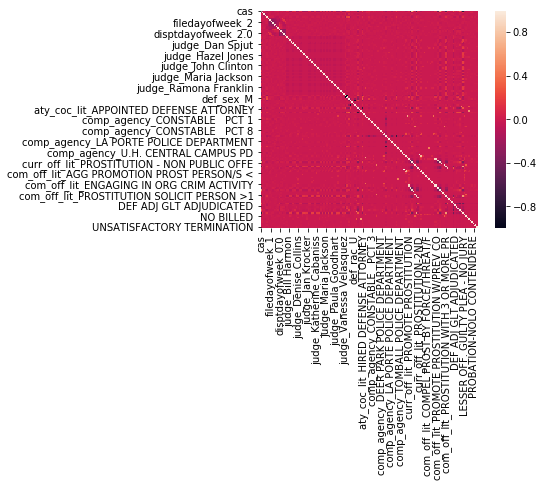

In [37]:
import seaborn as sns

fig =sns.heatmap(C, square=True)

In [42]:
C.def_sex_F.sort_values()

def_sex_M                                       -0.998152
aty_coc_lit_HIRED DEFENSE ATTORNEY              -0.234090
ageatfiling                                     -0.205035
comp_agency_SHERIFFS DEPARTMENT HARRIS COUNTY   -0.187727
curr_off_lit_PROMOTE PROSTITUTION               -0.165476
DEFERRED ADJUDICATION TERMINATED                -0.165386
cas                                             -0.161588
com_off_lit_PROMOTE PROSTITUTION                -0.155125
curr_off_lit_PROSTITUTION - NON PUBLIC OFFE     -0.116873
DEFERRED ADJUD OF GUILT                         -0.107708
com_off_lit_PROSTITUTION - NON PUBLIC OFFE      -0.107050
curr_off_lit_PROSTITUTION - PUBLIC OFFER        -0.076519
com_off_lit_PROSTITUTION - PUBLIC OFFER         -0.075104
com_off_lit_AGG PROMOTION PROST                 -0.049573
curr_off_lit_AGG PROMOTION PROST                -0.046866
def_rac_W                                       -0.044803
judge_Mike Fields                               -0.040473
judge_Margaret

In [44]:
C.def_sex_M.sort_values()

def_sex_F                                       -0.998152
aty_coc_lit_APPOINTED DEFENSE ATTORNEY          -0.208182
GUILTY PLEA-NO JURY                             -0.162693
curr_off_lit_PROSTITUTION WITH 3 OR MORE PR     -0.134728
com_off_lit_PROSTITUTION WITH 3 OR MORE PR      -0.126090
curr_off_lit_PROSTITUTION-2ND                   -0.112233
comp_agency_HOUSTON POLICE DEPARTMENT           -0.111421
def_rac_A                                       -0.108429
com_off_lit_PROSTITUTION-2ND                    -0.105486
Latitude                                        -0.068456
comp_agency_CONSTABLE   PCT 1                   -0.052800
judge_Susan Brown                               -0.048978
curr_off_lit_PROSTITUTION                       -0.047155
judge_Denise Bradley                            -0.046373
judge_Kelli Johnson                             -0.045271
judge_Jim Wallace                               -0.042698
aty_coc_lit_APPOINTED PUBLIC DEFENDER           -0.038175
judge_Hazel Jo

In [45]:
C.def_rac_B.sort_values()

def_rac_W                                       -0.854363
aty_coc_lit_HIRED DEFENSE ATTORNEY              -0.271199
def_rac_A                                       -0.262519
comp_agency_SHERIFFS DEPARTMENT HARRIS COUNTY   -0.137632
ageatfiling                                     -0.135921
DISMISSED                                       -0.097543
curr_off_lit_PROSTITUTION - NON PUBLIC OFFE     -0.088463
com_off_lit_PROSTITUTION - NON PUBLIC OFFE      -0.082716
DEFERRED ADJUDICATION TERMINATED                -0.080459
def_rac_U                                       -0.064421
comp_agency_CONSTABLE   PCT 1                   -0.063665
cas                                             -0.059670
DEFERRED ADJUD OF GUILT                         -0.055594
comp_agency_WEBSTER POLICE DEPARTMENT           -0.051377
disptdayofweek_3.0                              -0.034240
comp_agency_PASADENA POLICE DEPARTMENT          -0.030305
PROBATION TERMINATED                            -0.026112
comp_agency_BA

In [39]:
y_test.describe()

,ACQUITTAL BY JURY,CONVICTION BY JURY,CONVICTION-NOLO CONTENDERE,CONVICTION-PLEA OF GUILTY,DEF ADJ GLT ADJUDICATED,DEFERRED ADJUD OF GUILT,DEFERRED ADJUDICATION TERMINATED,DISMISSED,GUILTY PLEA - JURY VERDICT,GUILTY PLEA-NO JURY,LESSER OFF. GUILTY PLEA - NO JURY,NO BILLED,NOLO CONTENDRE PLEA - NO JURY (CC),NOT GUILTY PLEA - JURY VERDICT,PROBATION BY JURY TRIAL,PROBATION TERMINATED,PROBATION-NOLO CONTENDERE,PROBATION-PLEA OF GUILTY,UNSATISFACTORY TERMINATION
count,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.0,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000
mean,0.001535,0.001842,0.004297,0.478821,0.009515,0.087170,0.052486,0.175875,0.000307,0.157459,0.011357,0.000614,0.000307,0.0,0.000307,0.001228,0.000307,0.000614,0.003376
std,0.039151,0.042881,0.065421,0.499628,0.097095,0.282127,0.223040,0.380772,0.017520,0.364288,0.105977,0.024773,0.017520,0.0,0.017520,0.035023,0.017520,0.024773,0.058017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(xvar, prost['disposition'])
clf.score(xvar, prost['disposition'])

TypeError: '<' not supported between instances of 'str' and 'float'

In [32]:
#Very different results every time it runs, though never very good, .49 best seen, also .16 and .8

In [33]:
X_tn, X_tt, y_tn, y_tt = train_test_split(xvar, prost.disposition, test_size=0.2, random_state=11)

In [34]:
clf = LinearSVC().fit(X_tn, y_tn)
clf.score(X_tn, y_tn)

0.0084220562529795009

In [35]:
clf.score(X_tt, y_tt)

0.0082618366698442962

In [36]:
#best scores seen ~.49

In [37]:
#Experiment to look at which variables correlate

In [38]:
trial = xvar.join(yvar)
trial.head(2)

,cas,bam,Latitude,Longitude,ageatfiling,filedayofweek_0,filedayofweek_1,filedayofweek_2,filedayofweek_3,filedayofweek_4,filedayofweek_5,filedayofweek_6,disptdayofweek_0,disptdayofweek_1,disptdayofweek_2,disptdayofweek_3,disptdayofweek_4,judge_Analia Wilkerson,judge_Bill Harmon,judge_Brad Hart,judge_Catherine Evans,judge_Dan Spjut,judge_Darrell Jordan,judge_Denise Bradley,judge_Denise Collins,judge_Diane Bull,judge_Don Smyth,judge_George Powell,judge_Hazel Jones,judge_Herb Ritchie,judge_Jan Krocker,judge_Jay Karahan,judge_Jean Spradling,judge_Jeannine Barr,judge_Jim Wallace,judge_John Clinton,judge_Katherine Cabaniss,judge_Kelli Johnson,judge_Kristin Guiney,judge_Larry Standley,judge_Marc Carter,judge_Margaret Harris,judge_Maria Jackson,judge_Mike Fields,judge_Mike McSpadden,judge_Natalie Fleming,judge_Nikita Harmon,judge_Pam Derbyshire,judge_Paula Goodhart,judge_Ramona Franklin,judge_Randy Roll,judge_Robert Johnson,judge_Robin Brown,judge_Susan Brown,judge_Vanessa Velasquez,def_sex_F,def_sex_M,def_rac_A,def_rac_B,def_rac_I,def_rac_U,def_rac_W,aty_coc_lit_APPOINTED ATTORNEY ON APPEAL,aty_coc_lit_APPOINTED DEFENSE ATTORNEY,aty_coc_lit_APPOINTED PUBLIC DEFENDER,aty_coc_lit_HIRED ATTY ON APPEAL,aty_coc_lit_HIRED DEFENSE ATTORNEY,aty_coc_lit_PUBLIC DEFENDER APPOINTED ON APPEAL,comp_agency_ATTORNEY GENERAL STATE OF TEXAS,comp_agency_BAYTOWN POLICE DEPARTMENT,comp_agency_CONSTABLE PCT 1,comp_agency_CONSTABLE PCT 2,comp_agency_CONSTABLE PCT 3,comp_agency_CONSTABLE PCT 4,comp_agency_CONSTABLE PCT 5,comp_agency_CONSTABLE PCT 6,comp_agency_CONSTABLE PCT 7,comp_agency_CONSTABLE PCT 8,comp_agency_DEER PARK POLICE DEPARTMENT,comp_agency_DEPARTMENT OF PUBLIC SAFETY,comp_agency_HARRIS COUNTY D. A.,comp_agency_HOUSTON POLICE DEPARTMENT,comp_agency_JACINTO CITY POLICE DEPARTMENT,comp_agency_JERSEY VILLAGE POLICE DEPARTMENT,comp_agency_LA PORTE POLICE DEPARTMENT,comp_agency_METRO P. D. CITY OF HOUSTON,comp_agency_PASADENA POLICE DEPARTMENT,comp_agency_SEABROOK POLICE DEPARTMENT,comp_agency_SHERIFFS DEPARTMENT HARRIS COUNTY,comp_agency_TEXAS ALCOHOLIC BEVERAGE CONTROL,comp_agency_TOMBALL POLICE DEPARTMENT,comp_agency_U.H. CENTRAL CAMPUS PD,comp_agency_WEBSTER POLICE DEPARTMENT,curr_off_lit_AGG PROMOTION OF PROSTITUTION,curr_off_lit_AGG PROMOTION PROST,curr_off_lit_ATT AGG PROM OF PROSTITUTION,curr_off_lit_PROMOTE PROSTITUTION,curr_off_lit_PROSTITUTION,curr_off_lit_PROSTITUTION - NON PUBLIC OFFE,curr_off_lit_PROSTITUTION - PUBLIC OFFER,curr_off_lit_PROSTITUTION SOLICIT PERSON >1,curr_off_lit_PROSTITUTION WITH 3 OR MORE PR,curr_off_lit_PROSTITUTION-2ND,com_off_lit_AGG PROMOTION OF PROSTITUTION,com_off_lit_AGG PROMOTION PROST,com_off_lit_ATTEMPTED COMPEL PROSTITUTION,com_off_lit_BRIBERY,com_off_lit_COMPEL PROST BY FORCE/THREAT/F,com_off_lit_COMPEL PROSTITUTION-FORCE,com_off_lit_COMPEL PROSTITUTION-MINOR,com_off_lit_COMPELLING PROSTITUTION < 18 Y,com_off_lit_ENGAGING IN ORG CRIM ACTIVITY,com_off_lit_PROMOTE PROSTITUTION,com_off_lit_PROMOTE PROSTITUTION W/PREV CO,com_off_lit_PROSTITUTION,com_off_lit_PROSTITUTION - NON PUBLIC OFFE,com_off_lit_PROSTITUTION - PUBLIC OFFER,com_off_lit_PROSTITUTION PUBLIC PAY FEE 3,com_off_lit_PROSTITUTION SOLICIT PERSON >1,com_off_lit_PROSTITUTION WITH 3 OR MORE PR,com_off_lit_PROSTITUTION-2ND,ACQ JURY VERDICT,ACQUITTAL BY JURY,CONVICTION BY JURY,CONVICTION BY TRIAL TO COURT,CONVICTION-NOLO CONTENDERE,CONVICTION-PLEA OF GUILTY,DEF ADJ GLT ADJUDICATED,DEFERRED ADJUD OF GUILT,DEFERRED ADJUDICATION TERMINATED,DIRECTED VERDICT OF NOT GUILTY,DISM OTHER,DISMISSED,DISMISSED CASE REFILED,DISMISSED DEFENDANT CONVICTED ON ANOTHER CHARGE,DISMISSED INSUFFICIENT EVIDENCE,DISMISSED OTHER,DISMISSED TRANSFER CCCL REDUCED TO MISD.,GUILTY PLEA - JURY VERDICT,GUILTY PLEA-NO JURY,LESSER OFF. GUILTY PLEA - NO JURY,LESSER OFF. NOT GUILTY PLEA-JURY VERDICT,NO BILLED,NOLO CONTENDRE PLEA - NO JURY (CC),NOT GUILTY PLEA - JURY VERDICT,PROB/DADJ TERMED - DEF DECEASED,PROBATION BY JURY TRIAL,PROBATION TERMINATED,PROBATION-NOLO CONTENDERE,PROBATION-PL

In [39]:
#visualized 'heatmap' of correlations between the variables 
import seaborn as sns
corrmat= trial.corr ()
sns.heatmap(corrmat, square=True)

In [41]:
from sklearn import preprocessing as pp

#change scale of data to range of 0 to 1
scaler = pp.MinMaxScaler()
scale = pd.DataFrame(scaler.fit_transform(trial), columns= trial.columns, index = trial.index)
#Set up IV matrix and DV array to test model accuracy
dv = yvar.columns
for var in dv:
    print(var)
    y = pd.DataFrame()
    y = scale[var]
    X = scale.copy()
    del X[var]
    print(X.head())

sgdr = lm.SGDRegressor(n_iter=1000)  # or any sklearn regressor that you like
sgdr.fit(X,y)
sgdr.score(X, y)

ACQ JURY VERDICT
        cas      bam  Latitude  Longitude  ageatfiling  filedayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833              0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750              0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667              0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250              0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750              0.0   

   filedayofweek_1  filedayofweek_2  filedayofweek_3  filedayofweek_4  \
1              0.0              1.0              0.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              0.0              0.0              1.0              0.0   
5              0.0              0.0              1.0              0.0   

   filedayofweek_5  filedayofweek_6  disptdayofweek_0  disptdayofweek_1  \
1              0.0

        cas      bam  Latitude  Longitude  ageatfiling  filedayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833              0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750              0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667              0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250              0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750              0.0   

   filedayofweek_1  filedayofweek_2  filedayofweek_3  filedayofweek_4  \
1              0.0              1.0              0.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              0.0              0.0              1.0              0.0   
5              0.0              0.0              1.0              0.0   

   filedayofweek_5  filedayofweek_6  disptdayofweek_0  disptdayofweek_1  \
1              0.0              0.0

        cas      bam  Latitude  Longitude  ageatfiling  filedayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833              0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750              0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667              0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250              0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750              0.0   

   filedayofweek_1  filedayofweek_2  filedayofweek_3  filedayofweek_4  \
1              0.0              1.0              0.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              0.0              0.0              1.0              0.0   
5              0.0              0.0              1.0              0.0   

   filedayofweek_5  filedayofweek_6  disptdayofweek_0  disptdayofweek_1  \
1              0.0              0.0

        cas      bam  Latitude  Longitude  ageatfiling  filedayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833              0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750              0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667              0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250              0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750              0.0   

   filedayofweek_1  filedayofweek_2  filedayofweek_3  filedayofweek_4  \
1              0.0              1.0              0.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              0.0              0.0              1.0              0.0   
5              0.0              0.0              1.0              0.0   

   filedayofweek_5  filedayofweek_6  disptdayofweek_0  disptdayofweek_1  \
1              0.0              0.0

        cas      bam  Latitude  Longitude  ageatfiling  filedayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833              0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750              0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667              0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250              0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750              0.0   

   filedayofweek_1  filedayofweek_2  filedayofweek_3  filedayofweek_4  \
1              0.0              1.0              0.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              0.0              0.0              1.0              0.0   
5              0.0              0.0              1.0              0.0   

   filedayofweek_5  filedayofweek_6  disptdayofweek_0  disptdayofweek_1  \
1              0.0              0.0

        cas      bam  Latitude  Longitude  ageatfiling  filedayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833              0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750              0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667              0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250              0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750              0.0   

   filedayofweek_1  filedayofweek_2  filedayofweek_3  filedayofweek_4  \
1              0.0              1.0              0.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              0.0              0.0              1.0              0.0   
5              0.0              0.0              1.0              0.0   

   filedayofweek_5  filedayofweek_6  disptdayofweek_0  disptdayofweek_1  \
1              0.0              0.0

        cas      bam  Latitude  Longitude  ageatfiling  filedayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833              0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750              0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667              0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250              0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750              0.0   

   filedayofweek_1  filedayofweek_2  filedayofweek_3  filedayofweek_4  \
1              0.0              1.0              0.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              0.0              0.0              1.0              0.0   
5              0.0              0.0              1.0              0.0   

   filedayofweek_5  filedayofweek_6  disptdayofweek_0  disptdayofweek_1  \
1              0.0              0.0

        cas      bam  Latitude  Longitude  ageatfiling  filedayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833              0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750              0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667              0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250              0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750              0.0   

   filedayofweek_1  filedayofweek_2  filedayofweek_3  filedayofweek_4  \
1              0.0              1.0              0.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              0.0              0.0              1.0              0.0   
5              0.0              0.0              1.0              0.0   

   filedayofweek_5  filedayofweek_6  disptdayofweek_0  disptdayofweek_1  \
1              0.0              0.0

        cas      bam  Latitude  Longitude  ageatfiling  filedayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833              0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750              0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667              0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250              0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750              0.0   

   filedayofweek_1  filedayofweek_2  filedayofweek_3  filedayofweek_4  \
1              0.0              1.0              0.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              0.0              0.0              1.0              0.0   
5              0.0              0.0              1.0              0.0   

   filedayofweek_5  filedayofweek_6  disptdayofweek_0  disptdayofweek_1  \
1              0.0              0.0

        cas      bam  Latitude  Longitude  ageatfiling  filedayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833              0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750              0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667              0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250              0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750              0.0   

   filedayofweek_1  filedayofweek_2  filedayofweek_3  filedayofweek_4  \
1              0.0              1.0              0.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              0.0              0.0              1.0              0.0   
5              0.0              0.0              1.0              0.0   

   filedayofweek_5  filedayofweek_6  disptdayofweek_0  disptdayofweek_1  \
1              0.0              0.0

        cas      bam  Latitude  Longitude  ageatfiling  filedayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833              0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750              0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667              0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250              0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750              0.0   

   filedayofweek_1  filedayofweek_2  filedayofweek_3  filedayofweek_4  \
1              0.0              1.0              0.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              0.0              0.0              1.0              0.0   
5              0.0              0.0              1.0              0.0   

   filedayofweek_5  filedayofweek_6  disptdayofweek_0  disptdayofweek_1  \
1              0.0              0.0

        cas      bam  Latitude  Longitude  ageatfiling  filedayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833              0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750              0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667              0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250              0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750              0.0   

   filedayofweek_1  filedayofweek_2  filedayofweek_3  filedayofweek_4  \
1              0.0              1.0              0.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              0.0              0.0              1.0              0.0   
5              0.0              0.0              1.0              0.0   

   filedayofweek_5  filedayofweek_6  disptdayofweek_0  disptdayofweek_1  \
1              0.0              0.0

        cas      bam  Latitude  Longitude  ageatfiling  filedayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833              0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750              0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667              0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250              0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750              0.0   

   filedayofweek_1  filedayofweek_2  filedayofweek_3  filedayofweek_4  \
1              0.0              1.0              0.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              0.0              0.0              1.0              0.0   
5              0.0              0.0              1.0              0.0   

   filedayofweek_5  filedayofweek_6  disptdayofweek_0  disptdayofweek_1  \
1              0.0              0.0

        cas      bam  Latitude  Longitude  ageatfiling  filedayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833              0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750              0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667              0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250              0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750              0.0   

   filedayofweek_1  filedayofweek_2  filedayofweek_3  filedayofweek_4  \
1              0.0              1.0              0.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              0.0              0.0              1.0              0.0   
5              0.0              0.0              1.0              0.0   

   filedayofweek_5  filedayofweek_6  disptdayofweek_0  disptdayofweek_1  \
1              0.0              0.0

        cas      bam  Latitude  Longitude  ageatfiling  filedayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833              0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750              0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667              0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250              0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750              0.0   

   filedayofweek_1  filedayofweek_2  filedayofweek_3  filedayofweek_4  \
1              0.0              1.0              0.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              0.0              0.0              1.0              0.0   
5              0.0              0.0              1.0              0.0   

   filedayofweek_5  filedayofweek_6  disptdayofweek_0  disptdayofweek_1  \
1              0.0              0.0

        cas      bam  Latitude  Longitude  ageatfiling  filedayofweek_0  \
1  0.000000  0.01682  0.623704   0.396358     0.270833              0.0   
2  0.000075  0.01682  0.630443   0.396684     0.218750              0.0   
3  0.000144  0.01682  0.622409   0.396555     0.291667              0.0   
4  0.000164  0.01682  0.622833   0.395657     0.281250              0.0   
5  0.000168  0.01682  0.621972   0.396437     0.343750              0.0   

   filedayofweek_1  filedayofweek_2  filedayofweek_3  filedayofweek_4  \
1              0.0              1.0              0.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              0.0              0.0              1.0              0.0   
5              0.0              0.0              1.0              0.0   

   filedayofweek_5  filedayofweek_6  disptdayofweek_0  disptdayofweek_1  \
1              0.0              0.0

NameError: name 'lm' is not defined

In [ ]:
#build simple models that only look at one variable at a time, then add in more variables

In [42]:
#assessing whether 2016/17 differences are due to lack of records/cases not yet disposed on

In [10]:
prost['case_len']= prost.dispdt - prost.fda

In [11]:
#subset to 2010-2015
sub = prost[prost.fda < pd.datetime(2015, 12, 31)]

In [12]:
max(sub.case_len)

Timedelta('2988 days 00:00:00')

In [13]:
np.mean(sub.case_len)

Timedelta('114 days 08:26:19.354838')

In [14]:
np.median(sub.case_len).astype('timedelta64[D]')

numpy.timedelta64(7,'D')

In [48]:
len(sub[sub.case_len > np.mean(sub.case_len)])/len(sub.case_len)

0.26297653958944284

In [49]:
from datetime import timedelta
len(sub[sub.case_len > timedelta(days = 365)])/len(sub.case_len)

0.08189149560117302

In [50]:
#Import raw data
raw= pd.read_csv('data\parsed.csv', index_col=0, encoding = 'latin1', low_memory=False)

In [51]:
'''
f = open('data\parsed.csv')
for line in enumerate(f):
    print (line)
    if line[0] > 1:
        break
        '''

"\nf = open('data\\parsed.csv')\nfor line in enumerate(f):\n    print (line)\n    if line[0] > 1:\n        break\n        "

In [52]:
len(raw)

1697805

In [53]:
#drop last row
raw = raw.drop(raw.index[-1])

In [54]:
raw['fda'] = pd.to_datetime(raw.fda)
raw['dispdt'] = pd.to_datetime(raw.dispdt)#, format='%Y%m%d')
raw['cas'] = pd.to_numeric(raw.cas, downcast='integer')
raw['bam'] = pd.to_numeric(raw.bam, downcast='integer')
raw['nda'] = pd.to_datetime(raw.nda)
raw['def_dob'] = pd.to_datetime(raw.def_dob)

In [55]:
#Calculate age at filing date
raw['ageatfiling'] = raw.fda - raw.def_dob
#mewo = raw.dropna(subset=['def_dob'])
#mewo['ageatfiling'] = relativedelta(mewo.fda, mewo.def_dob).years

In [56]:
#Find day of the week
raw['disptdayofweek'] = raw.dispdt.dt.dayofweek

In [57]:
prost.curr_off_lit.unique()

array(['PROSTITUTION', 'PROSTITUTION-2ND', 'PROMOTE PROSTITUTION',
       'AGG PROMOTION PROST', 'ATT AGG PROM OF PROSTITUTION',
       'PROSTITUTION WITH 3 OR MORE PR', 'PROSTITUTION SOLICIT PERSON >1',
       'PROSTITUTION - NON PUBLIC OFFE', 'PROSTITUTION - PUBLIC OFFER',
       'AGG PROMOTION OF PROSTITUTION'], dtype=object)

In [58]:
prost_off = list(prost.curr_off_lit.unique())

In [59]:
#Limit raw data to cases with Current Offense matching those in "prost" (prostitution cases pulled from dashboard)
df= raw[raw.curr_off_lit.isin(prost_off)]

In [60]:
#Limit df to the same date range at "prost"
df = df[df.fda>= prost.fda.min()]
df= df[df.fda <=prost.fda.max()]

In [61]:
len(df.cas.unique())

14774

In [62]:
len(prost.cas.unique())

14656

In [63]:
len(df.def_nam.unique())

12248

In [64]:
df.head(1)

,cas,fda,ins,cad,crt,cst,dst,bam,curr_off,curr_off_lit,curr_l_d,com_off,com_off_lit,com_l_d,gj_off,gj_off_lit,gj_l_d,nda,cnc,rea,def_nam,def_spn,def_rac,def_sex,def_dob,def_stnum,def_stnam,def_cty,def_st,def_zip,aty_nam,aty_spn,aty_coc,aty_coc_lit,comp_nam,comp_agency,off_rpt_num,dispdt,disposition,sentence,ageatfiling,disptdayofweek
cdi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
002,165189601010,2010-01-04,MIN,DISP,15.0,C,D,5000.0,400403.0,PROSTITUTION,MB,400403.0,PROSTITUTION,MB,NaN,NaN,NaN,2010-01-11,MO,HEAR,"ROCHA, REYNA",2270533.0,W,F,1989-08-20,6111,WINSOME,HOUSTON,TX,77057.0,"OWMBY, JOSEPH",65386550.0,AAT,APPOINTED DEFENSE ATTORNEY,"HETT, KENNETH",HOUSTON POLICE DEPARTMENT,1370710P,2010-01-11,CONVICTION-PLEA OF GUILTY,30 DAYS HCJ,7442 days,0


In [65]:
df = df.drop('ins', axis=1)
df = df.drop('cad', axis=1)
df = df.drop('cst', axis=1)
df = df.drop('dst', axis=1)
df = df.drop('curr_off', axis=1)
df = df.drop('curr_l_d', axis=1)
df = df.drop('com_off', axis=1)
df = df.drop('gj_off', axis=1)
df = df.drop('gj_off_lit', axis=1)
df = df.drop('gj_l_d', axis=1)
df = df.drop('cnc', axis=1)
df = df.drop('rea', axis=1)
df = df.drop('def_spn', axis=1)
df = df.drop('aty_spn', axis=1)
df = df.drop('aty_coc', axis=1)